In [1]:
from matplotlib import pyplot as plt
from datetime import datetime as dt
import pandas as pd
import requests
import numpy as np

plt.rcParams["figure.figsize"] = [5, 3.1]

# Lecture 19: Least squares fitting

... time to starting thinking about ~~Christmas~~ ~~data~~ coursework! :(

*Module feedback*: https://leeds.bluera.com/leeds

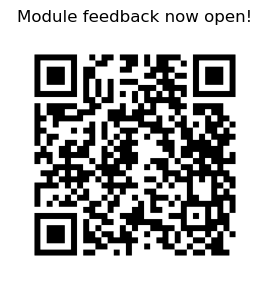

In [2]:
import feedback

plt.figure(figsize=(4, 3))
feedback.feedback()

## Motivation

-   Suppose we are given data point representing a quantity over time.

-   We want to represent the graph of this data as a simple curve.

-   The examples on the following slide show the fitting of two different curves through some experimental data:

    -   a straight line;
    -   a quadratic curve.

### Weekly earnings

In [3]:
data_url = "http://www.ons.gov.uk/file?uri=/employmentandlabourmarket/peopleinwork/earningsandworkinghours/datasets/averageweeklyearningsearn01/current/earn01nov2022.xls"
r = requests.get(data_url)
df = pd.read_excel(r.content, sheet_name="1. AWE Total Pay")
df = df.iloc[:, [0, 1]]
df.columns = ["date", "earnings"]
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna()
# since 2008
df = df[df["date"] > "2008-01-01"]


def to_days(date):
    return float((date - dt(2008, 1, 1)).days)


days = df.apply(lambda row: to_days(row.date), axis=1)

Raw data for average UK weekly earnings since 2008 (from ONS)

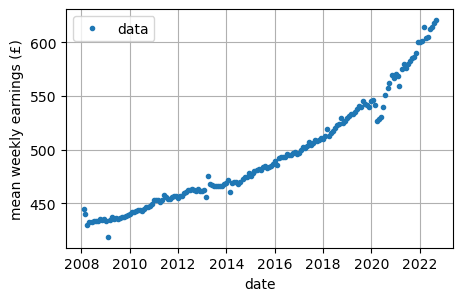

In [4]:
plt.plot(df["date"], df["earnings"], ".", label="data")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.grid()
plt.legend()
plt.show()

Raw data for weekly earning with a straight line of best fit:

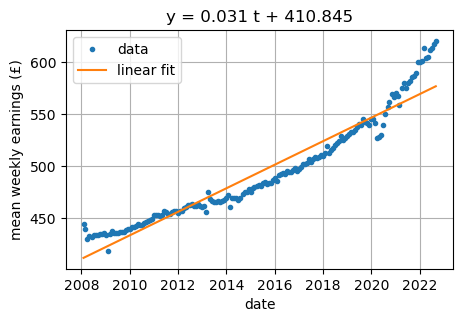

In [5]:
def fit_line(x, y):
    A = np.array([[d, 1] for d in x])
    b = np.array([[e] for e in y])

    AtA = A.T @ A
    Atb = A.T @ b

    coef = np.linalg.solve(AtA, Atb)
    return lambda t: coef[0] * t + coef[1], coef


fit1, coef = fit_line(days, df["earnings"])

plt.plot(df["date"], df["earnings"], ".", label="data")
plt.plot(df["date"], fit1(days), label="linear fit")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.title(f"y = {coef[0][0]:.3f} t + {coef[1][0]:.3f}")
plt.grid()
plt.legend()
plt.show()

Raw data for weekly earnings with a quadric curve of best fit:

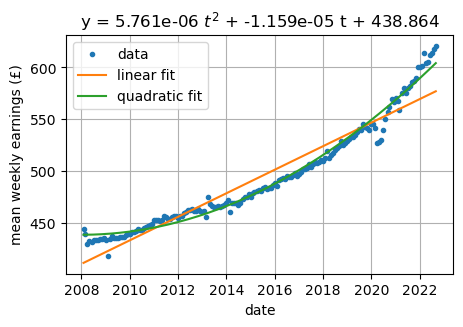

In [6]:
def fit_quad(x, y):
    A = np.array([[d * d, d, 1] for d in x])
    b = np.array([[e] for e in y])

    AtA = A.T @ A
    Atb = A.T @ b

    coef = np.linalg.solve(AtA, Atb)
    return lambda t: coef[0] * t * t + coef[1] * t + coef[2], coef


fit2, coef2 = fit_quad(days, df["earnings"])

plt.plot(df["date"], df["earnings"], ".", label="data")
plt.plot(df["date"], fit1(days), label="linear fit")
plt.plot(df["date"], fit2(days), label="quadratic fit")
plt.xlabel("date")
plt.ylabel("mean weekly earnings (£)")
plt.title(f"y = {coef2[0][0]:.3e} $t^2$ + {coef2[1][0]:.3e} t + {coef2[2][0]:.3f}")
plt.grid()
plt.legend()
plt.show()

.... how do we do this....

## An example of best linear fit

Suppose that the following measured data, $y$, is observed at different times $t$:

$$
\begin{array}{c|cccc}
t & 1 & 2 & 3 & 4 \\
\hline
y & 1 & 1.5 & 2.5 & 3.5
\end{array}
$$

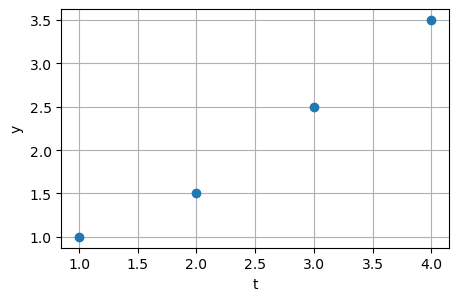

In [7]:
tt = [1.0, 2.0, 3.0, 4.0]
yy = [1.0, 1.5, 2.5, 3.5]

plt.figure
plt.plot(tt, yy, "o")

plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

$$
\begin{array}{c|cccc}
t & 1 & 2 & 3 & 4 \\
\hline
y & 1 & 1.5 & 2.5 & 3.5
\end{array}
$$

- Suppose we want to represent the data using a straight line: $y = m t + c$

- An *exact fit* would require the following equations to be satisfied:

$$
    \begin{aligned}
    m \times 1 + c & = 1 \\
    m \times 2 + c & = 1.5 \\
    m \times 3 + c & = 2.5 \\
    m \times 4 + c & = 3.5.
    \end{aligned}
$$

> This is a system of linear equations for $(m , c)$ but there are too many equations!

## An example of best quadratic fit

Suppose that the following measured data, $y$, is observed at different times $t$:

$$
\begin{array}{c|ccccc}
t & -1.0 & -0.5 & 0  & 0.5 & 1.0 \\
\hline
y & 1.0 & 0.5 & 0.0 & 0.5 & 2.0
\end{array}
$$

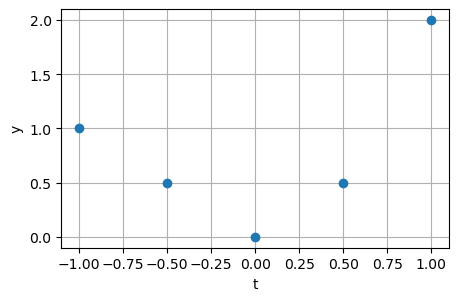

In [8]:
tt = [-1.0, -0.5, 0.0, 0.5, 1.0]
yy = [1.0, 0.5, 0.0, 0.5, 2.0]

plt.plot(tt, yy, "o")

plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

$$
\begin{array}{c|ccccc}
t & -1.0 & -0.5 & 0  & 0.5 & 1.0 \\
\hline
y & 1.0 & 0.5 & 0.0 & 0.5 & 2.0
\end{array}
$$

-   Consider representing this data as a quadratic line:

    $$
    y = a + b t + c t^2
    $$

-   An *exact fit* would require the following equations to be satisfied:

    $$
    \begin{aligned}
    a + b \times -1 + c \times (-1)^2 & = 1 \\
    a + b \times -0.5 + c \times (-0.5)^2 & = 0.5 \\
    a + b \times 0 + c \times 0^2 & = 0 \\
    a + b \times 0.5 + c \times 0.5^2 & = 0.5 \\
    a + b \times 1 + c \times 1^2 & = 2.
    \end{aligned}
    $$

> We recognise this as a system of linear equations for $(a, b, c)$ - but there are too many equations!!

## Best approximation

> Given that there is no *exact fit* solution to these **overdetermined systems** of equations what should we do?

## What can we do?

Recall the definition of the **residual** for the system $A \vec{x} = \vec{b}$:

$$
\vec{r} = \vec{b} - A \vec{x},
$$

-   When $\vec{r} = \vec{0}$, then $\vec{x} = \vec{x}^*$ the exact solution.
-   When there is no exact solution the next best thing is to make $\vec{r}$ as small as possible.
-   This means finding $\vec{x}$ that **minimises** $\| \vec{r} \|^2$.

## The normal equations

*It turns out* that the $\vec{x}$ that minimises $\|\vec{b} - A \vec{x}\|^2$ is the same $\vec{x}$ that satisfies the following *square* system of equations:

$$
A^T A \vec{x} = A^T \vec{b}
$$

## The normal equations

-   These equations are referred to as the **normal equations** for the overdetermined system $A \vec{x} = \vec{b}$.

-   The square matrix $A^T A$ is generally non-singular (i.e., the solution is unique).

-   You can find this solution using Gaussian elimination (for example).

-   The normal equations, when solved, give the **best solution** to the original problem in the sense of minimising the Euclidean norm of the residual.

### Example 1

Find the least squares approximation to the match the data:

$$
\begin{array}{c|ccccc}
t & -1.0 & -0.5 & 0  & 0.5 & 1.0 \\
\hline
y & 1.0 & 0.5 & 0.0 & 0.5 & 2.0
\end{array}
$$

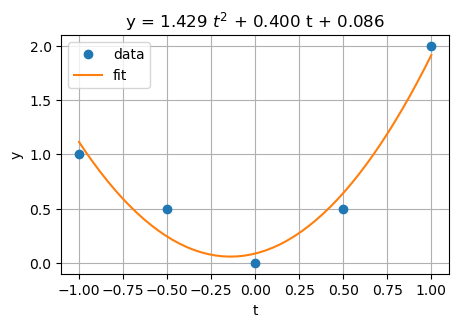

In [9]:
tt = [-1.0, -0.5, 0.0, 0.5, 1.0]
yy = [1.0, 0.5, 0.0, 0.5, 2.0]


plt.plot(tt, yy, "o", label="data")

fit, coef2 = fit_quad(tt, yy)
tt = np.linspace(min(tt), max(tt))
fitt = fit(tt)

plt.plot(tt, fitt, label="fit")
plt.title(f"y = {coef2[0][0]:.3f} $t^2$ + {coef2[1][0]:.3f} t + {coef2[2][0]:.3f}")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

## Problems with the normal equations

Consider the matrix $A = \begin{pmatrix} 1 & 1 \\ \varepsilon & 0 \\ 0 & \varepsilon \end{pmatrix}$, which gives

$$
A^T A = \begin{pmatrix}
1 + \varepsilon^2 & 1 \\
1 & 1 + \varepsilon^2.
\end{pmatrix}
$$

If $\varepsilon \approx \sqrt{eps}$ then the effects of rounding error can make $A^T A$ appear to be singular.

See also: Nick Higham, [Seven sins of numerical linear algebra](https://nhigham.com/2022/10/11/seven-sins-of-numerical-linear-algebra/)

## Sensitivity and conditioning

-   The condition number of a square matrix $A$ describes how close that matrix is to being singular.

-   If the condition number is larger then $A$ is "close" to being singular.

-   When the condition number is very large it is likely that the effects of rounding errors will be most serious: we refer to such a system as being ill-conditioned.

-   The normal equations are typically quite ill-conditioned and so it is essential to use high precision arithmetic to solve them and specialised algorithms.

## Summary

-   Overdetermined systems are common in data modelling and they typically have no solution.

-   Even so, it is possible to find a *closest* solution to the problem.

-   It is common to measure this closeness in the Euclidean norm and this leads naturally to the least squares approximation.

-   A solution to this problem can be found by solving the normal equations but can must be taken to use arithmetic with sufficient precision and specialised algorithms.